<a href="https://colab.research.google.com/github/Bzitsman/data-analytics-profolio/blob/main/Linear_Regression_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ecommerce Store - Linear Regession Project**

**Scenario**

An Ecommerce company based in San Diego that sells clothing online but also has in-store style and clothing advice sessions. Customers come into the store and have sessions/meetings with a personal stylist. The client can go home and place an on the mobile app or website for the clothes they want.

The company is trying to decide whether to focus its efforts on its mobile app experience or website. They've hired you on contract to help them figure it out.

Made up data will be given for this project.

**Import Libraries**

In [41]:
# data analysis

import numpy as np
import pandas as pd
#visulazation

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine Learning package for Linear Reression modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Read in Data 
Check data type and missing data

In [3]:
df = pd.read_csv('/content/Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## Exploratory Data Analysis

In [6]:
# selected color palette and style for all graphes made with seaborn
sns.set_palette("rocket")
sns.set_style('whitegrid')

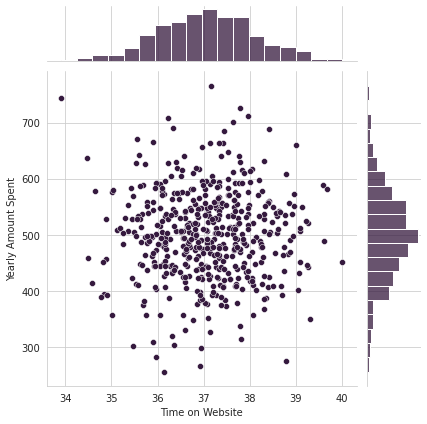

In [7]:
# This chart comparies time of the websit vs. yearly amount spent
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

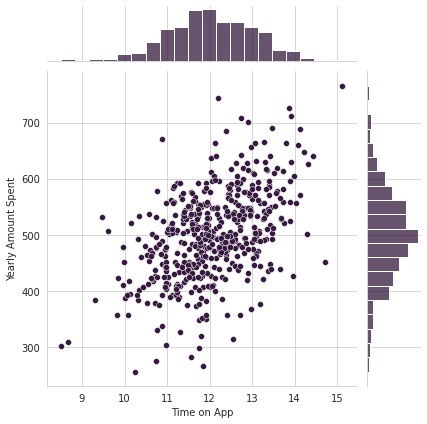

In [8]:
#this chart looks at time on the app vs. yearly amount spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df)

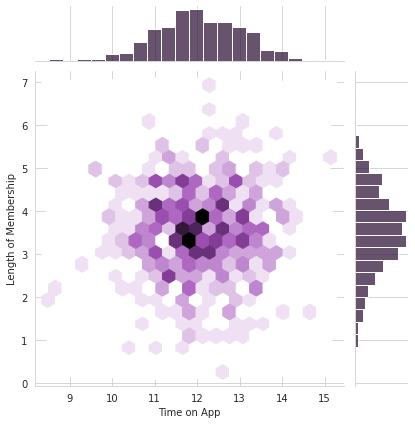

In [9]:
# this chart comparies time on the app vs. length of membership. it is a hex design
sns.jointplot(x='Time on App', y='Length of Membership', data=df, kind='hex')

at this point I decided to drop all non relavent columns for the data

In [16]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [18]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [24]:
df.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)


In [25]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


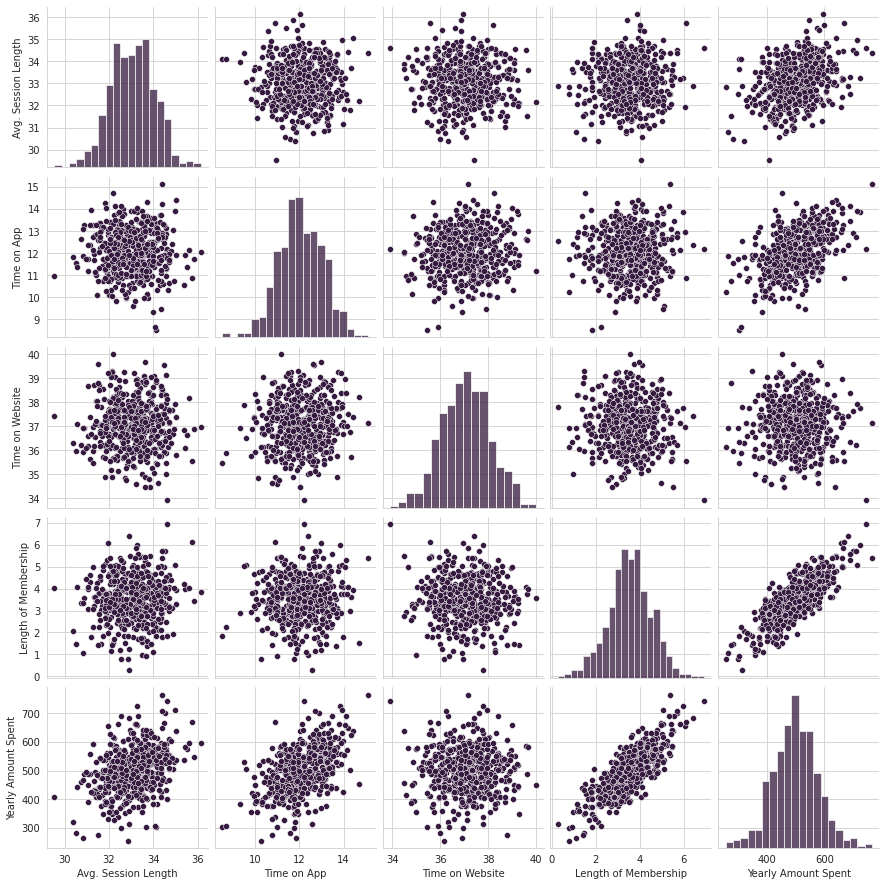

In [26]:

sns.pairplot(df)

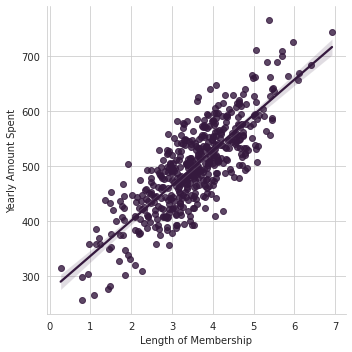

In [33]:

sns.lmplot(x='Length of Membership', y= 'Yearly Amount Spent', data=df)


The data looks to have a normal standard deviation

# Training and Testing Data


In [34]:
X = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]

y = df['Yearly Amount Spent']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [38]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.72425621 38.59713548  0.45914788 61.67473243]


In [39]:
predictions = lm.predict(X_test)
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

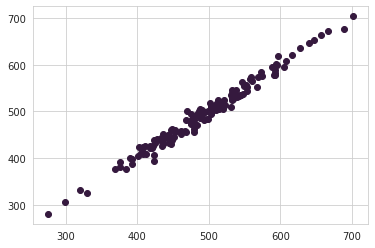

In [40]:
#View model
plt.scatter(y_test,predictions)

# **Evaluating the Model**

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 8.426091641432116
MSE: 103.91554136503333
RMSE: 10.193897260863155


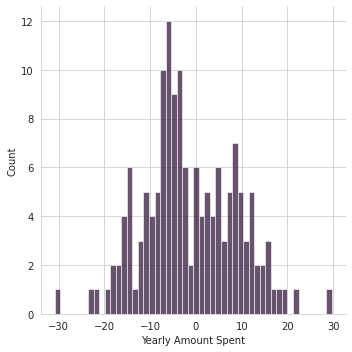

In [43]:
sns.displot((y_test-predictions),bins=50);

## **Conclusion**

In [44]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


** Interpreting the coefficients:**

*	Having all other features fixed, a one unit increase in *Avg. Session Length* is associated with an increase of 25.98 total dollars spent.
*	Holding all other features fixed, a one unit increase in *Time on App* is associated with an increase of 38.59 total dollars spent.
*	Having all other features fixed, a one unit increase in *Time on Website* is associated with an increase of 0.19 total dollars spent.
*	Having all other features fixed, a one unit increase in *Length of Membership* is associated with an increase of 61.27 total dollars spent.






# **Final Thoughts**

If I were to make a recommendation, I would need to know more financial information about this company. Also, I would want to take a deeper look at the Length of Membership and time spent on the app and website as well as the cost to get new customers. Furthermore, I would want to look at the possibility of moving the in-person style meeting to an online format to reach a large population. 